In the name of Allah

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

In [40]:
mpl.rcParams['figure.figsize'] = 4, 3
mpl.rcParams['lines.markersize'] = 2.5
mpl.rcParams['axes.titlesize'] = 'small'
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['xtick.labelsize'] = 'x-small'
mpl.rcParams['ytick.labelsize'] = 'x-small'
mpl.rcParams['legend.fontsize'] = 'small'

In [12]:
ws = load_workbook('linear_regression_data.xlsx', data_only=True)['Sheet1']
data = []
for i in range(2,  ws.max_row + 1):
    data.append([ws[f'A{i}'].value, ws[f'B{i}'].value,  ws[f'C{i}'].value,  ws[f'D{i}'].value])
data = np.array(data)

In [13]:
data

array([[740, 724, 739, 727],
       [724, 739, 727, 743],
       [739, 727, 743, 736],
       [727, 743, 736, 725],
       [743, 736, 725, 731],
       [736, 725, 731, 743],
       [725, 731, 743, 740],
       [731, 743, 740, 754],
       [743, 740, 754, 775],
       [740, 754, 775, 760]])

In [5]:
x = data[:, :3]
y = data[:, 3].reshape(-1, 1)

In [6]:
x, y

(array([[740, 724, 739],
        [724, 739, 727],
        [739, 727, 743],
        [727, 743, 736],
        [743, 736, 725],
        [736, 725, 731],
        [725, 731, 743],
        [731, 743, 740],
        [743, 740, 754],
        [740, 754, 775]]),
 array([[727],
        [743],
        [736],
        [725],
        [731],
        [743],
        [740],
        [754],
        [775],
        [760]]))

In [7]:
model = LinearRegression()

In [8]:
model.fit(x, y)

LinearRegression()

In [9]:
model.coef_, model.intercept_

(array([[0.29122845, 0.42817241, 0.4656458 ]]), array([-130.99841973]))

In [49]:
colors = ['r', 'g', 'b']

Text(0.5, 1.0, 'output with inputs')

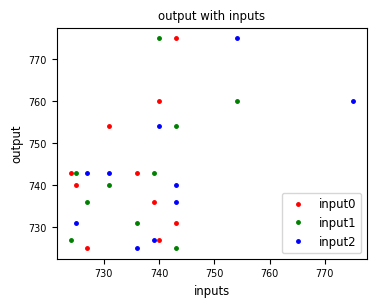

In [51]:
for i in range(x.shape[1]):
    plt.plot(x[:, i], y, 'o', color=colors[i], label=f'input{i}')
plt.legend()
plt.xlabel('inputs')
plt.ylabel('output')
plt.title('output with inputs')

In [23]:
x_smp = [750, 750, 750]
x_smp = np.array([x_smp])
y_smp = model.predict(x_smp)
y_smp

array([[757.78657008]])

In [24]:
y_prd = model.predict(x)

In [25]:
y, y_prd

(array([[727],
        [743],
        [736],
        [725],
        [731],
        [743],
        [740],
        [754],
        [775],
        [760]]),
 array([[738.61969926],
        [734.79488058],
        [741.47557121],
        [741.57206772],
        [738.11241233],
        [734.15779149],
        [739.11106253],
        [744.59956471],
        [753.32883005],
        [768.22812011]]))

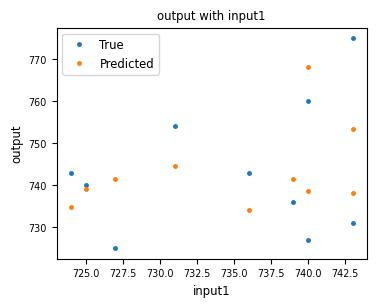

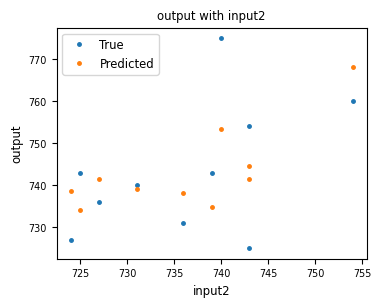

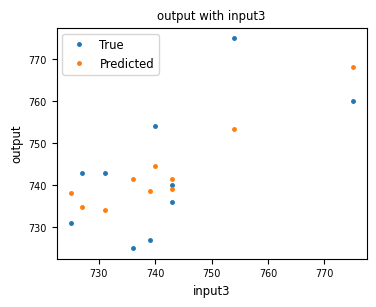

In [42]:
for i in range(x.shape[1]):
    plt.plot(x[:, i], y, 'o', label='True')
    plt.plot(x[:, i], y_prd, 'o', label='Predicted')
    input_name = f'input{i + 1}'
    plt.xlabel(input_name)
    plt.ylabel('output')
    plt.title(f'output with {input_name}')
    plt.legend()
    plt.show()

Text(0.5, 1.0, 'y_pred with y')

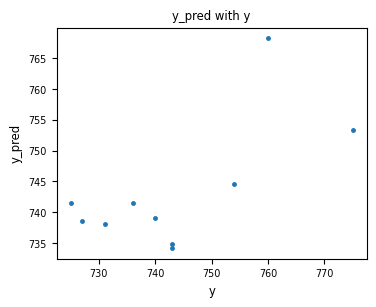

In [44]:
plt.plot(y, y_prd, 'o')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title(f'y_pred with y')